### Investigate 3422 null dates in scored_datetime
All variables have have null dates

In [1]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
filterDf  = load_df('filterDf')

###### Create Dataframe of null observations

In [3]:
nullDf = filterDf.filter(F.col('scored_datetime').isNull())

nullDf.count()

3422

3,422 null observations

###### Display distinct values

In [4]:
distinct_val(nullDf)

,0
assignment_attempt_number (aa),1
assignment_max_attempts (a),1
final_score_unweighted (aa),0
is_manual_scoring_required (aa),False
scored_datetime (aa),NaT


- assignment_attempt_number = 1
- assignment_max_attempts = 1
- final_score_unweighted = 0
  - Assessment attempts has no score
- is_manual_scoring_required = False
- scored_datetime = null (NaT)
  - not scored

###### Compare dates with full sample

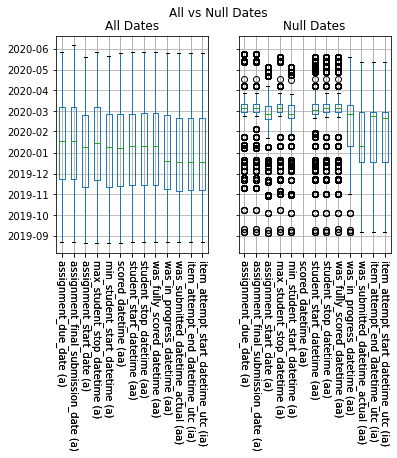

In [5]:
dual_date_boxplot(
    get_random_sample(filterDf),
    nullDf,
    title1="All Dates",
    title2='Null Dates',
    main='All vs Null Dates'
)

- Majority scheduled between 4/1 and 2/1
    - Median around 3/2020
    - Min around 2/2020
    - Max around 4/2020
- Outliers appear to follow same pattern between variables

###### response_correctness values for All vs Nulls
Score of 0 should be correlated with response_correctness = incorrect

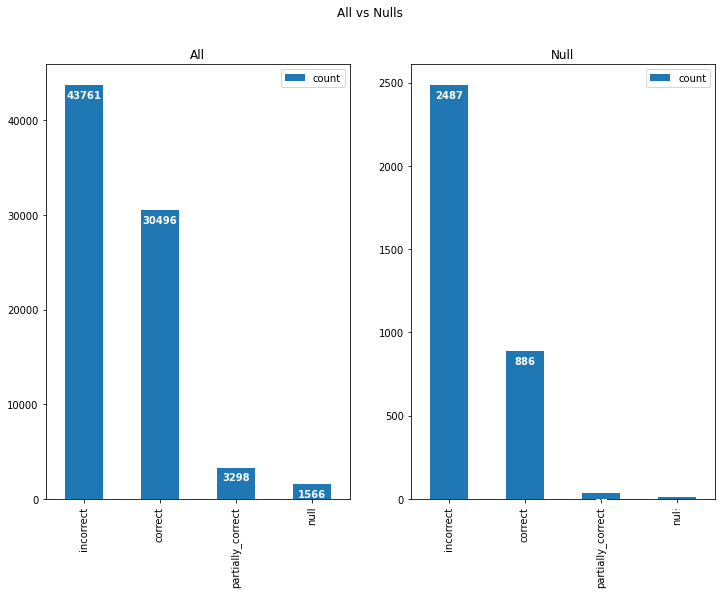

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,8), sharex=True)

response_correctness_bar_plot(filterDf, 'response_correctness', ax=ax1)
ax1.set_title('All')

response_correctness_bar_plot(nullDf, 'response_correctness', ax=ax2)
ax2.set_title('Null')

plt.suptitle('All vs Nulls')

plt.show()

- Appears to be items that have been scored and have an expected response_correctness
  - Similar distribution of values between null and all
- No correlation of the zero score with response_correctness = incorrect
  - Could be related to final_score_unweighted has 16,582 zero values

- Appear missing at random
- Variable will not be used
  - No further action needed

In [7]:
finish_todo('Investigate 3422 null dates in scored_datetime')

Finished: Investigate 3422 null dates in scored_datetime
